In [16]:
from qdisk.classes import FitsImage
import matplotlib.pyplot as plt
from eDisk_source_dict import source_dict
import os
%matplotlib widget

source = "L1489IRS"
# center_coord = source_dict[source]["radec"]
PA = source_dict[source]["PA"]
incl = source_dict[source]["incl"]
center_coord_SB = "04h04m43.080s 26d18m56.115s"
center_coord_SBLB = "04h04m43.080s 26d18m56.119s"

In [ ]:
imagename_SB = "./archive/image_DDT/L1489IRS_SB_continuum_robust_0.5.pbcor.tt0.fits"  # validated image
path = "/works/yamato/eDisk/L1489IRS/eDisk_image_products/"
savefilepath = "./VADP/"
robust = [0.5, 1.0, 2.0]
imagenamelist_SBLB = [
    path + f"L1489IRS_SBLB_continuum_robust_{r}.pbcor.tt0.fits" for r in robust
]  # validated image, but SB3 is not included

# generate radial emission profile
image = FitsImage(imagename_SB)
image.shift_phasecenter_toward(center_coord_SB)
image.radial_profile(
    PA=PA,
    incl=incl,
    save=True,
    wedge=45,
    savefileheader="r [arcsec] \t I [Jy / beam] \t dI [Jy / beam]",
    savefilename=savefilepath + os.path.basename(imagename_SB).replace(".fits", ".radialProfile"),
)


In [14]:
imagename_DDT_SB = "./archive/image_DDT/L1489IRS_SB_continuum_robust_0.5.pbcor.tt0.fits"
imagename_DDT_SBLB = "./image_DDT/L1489IRS_SBLB_continuum_robust_1.0.pbcor.tt0.smoothed_to_SBres.fits"
imagename_DDT_SBLB = "./test_JvM_effect/L1489IRS_SBLB_continuum_robust_1.0.JvMcorr.pbcor.fits"
imagename_DDT_SBLB = "/works/yamato/eDisk/L1489IRS/try1/trial_image_backup/L1489IRS_SBLB_continuum_robust_2.0.pbcor.tt0.fits"
# imagename_DDT = "L1489IRS_SBLB_continuum_robust_1.0_oldDDT.pbcor.tt0.smoothed.fits"
# imagename_archival = "./image_archival/L1489IRS_SB_continuum_robust_0.5.pbcor.tt0.fits"

In [81]:
from casatasks import imsmooth, exportfits

imsmooth(imagename=imagename_DDT_SBLB, major="0.29577arcsec", minor="0.200629arcsec", pa="7.453768deg", targetres=True, outfile=imagename_DDT_SBLB.replace(".fits", ".smoothed_to_SBres"))
exportfits(imagename=imagename_DDT_SBLB.replace(".fits", ".smoothed_to_SBres"), fitsimage=imagename_DDT_SBLB.replace(".fits", ".smoothed_to_SBres")+".fits", dropdeg=True)

In [15]:
image = FitsImage(imagename_DDT_SB)
image.shift_phasecenter_toward(center_coord)
# image.estimate_rms(rmin=8, rmax=10)
r_DDT_SB, I_DDT_SB, dI_DDT_SB = image.radial_profile(PA=PA, incl=incl, rmax=7)
I_DDT_SB /= image.Omega_beam_str
dI_DDT_SB /= image.Omega_beam_str
print(image.beam)

FileNotFoundError: [Errno 2] No such file or directory: './image_DDT/L1489IRS_SB_continuum_robust_0.5.pbcor.tt0.fits'

In [12]:
image = FitsImage(imagename_DDT_SBLB)
image.shift_phasecenter_toward(center_coord)
# image.estimate_rms(rmin=8, rmax=10)
r_DDT_SBLB, I_DDT_SBLB, dI_DDT_SBLB = image.radial_profile(PA=PA, incl=incl, rmax=7)
I_DDT_SBLB /= image.Omega_beam_str
dI_DDT_SBLB /= image.Omega_beam_str
print(image.Omega_beam_str)

Calculating radial profile...
Done.
8.235653226878812e-14


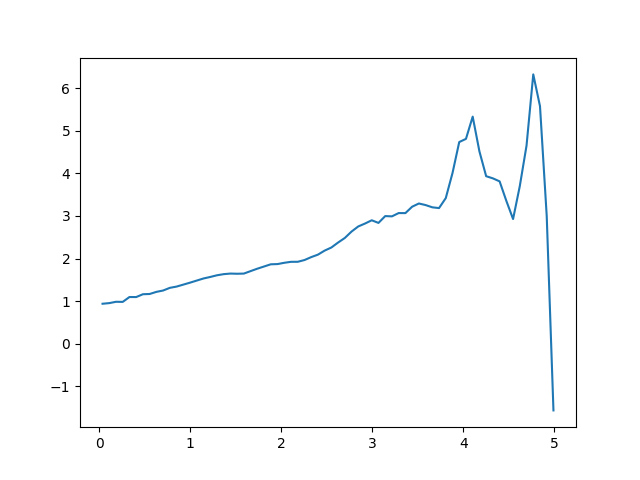

In [6]:
plt.figure()
plt.plot(r_DDT_SB[I_DDT_SBLB>0], I_DDT_SBLB[I_DDT_SBLB>0]/I_DDT_SB[I_DDT_SBLB>0], label="ratio")

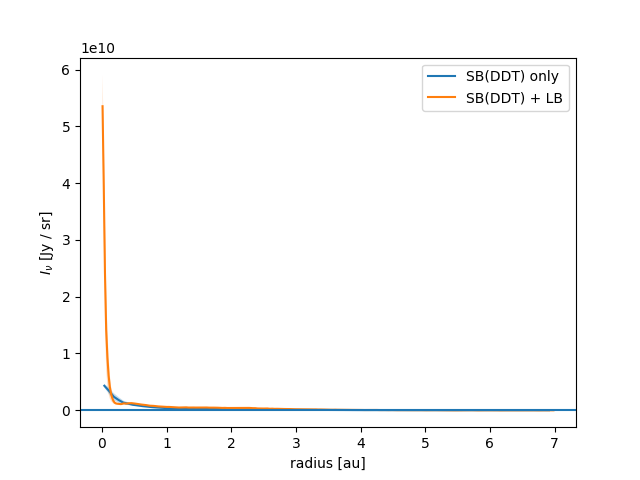

In [13]:
plt.figure()
plt.plot(r_DDT_SB, I_DDT_SB, label="SB(DDT) only")
plt.fill_between(r_DDT_SB, I_DDT_SB-dI_DDT_SB, I_DDT_SB + dI_DDT_SB, alpha=0.25)
plt.plot(r_DDT_SBLB, I_DDT_SBLB, label="SB(DDT) + LB")
plt.fill_between(r_DDT_SBLB, I_DDT_SBLB-dI_DDT_SBLB, I_DDT_SBLB + dI_DDT_SBLB, alpha=0.25)
plt.axhline(y=0.0)
plt.xlabel("radius [au]")
plt.ylabel("$I_\\nu$ [Jy / sr]")
# plt.yscale("log")
# plt.xscale("log")
# plt.xlim(0, 5)
plt.legend()

In [54]:
image = FitsImage(imagename_archival)
image.shift_phasecenter_toward("04h04m43.070s 26d18m56.214s") # SBLB
image.shift_phasecenter_toward("04h04m43.080s 26d18m56.119s") # SB
# image.estimate_rms(rmin=8, rmax=10)
r_archival, I_archival, dI_archival = image.radial_profile(PA=PA, incl=incl, rmax=7)
I_archival /= image.Omega_beam_str
dI_archival /= image.Omega_beam_str
print(image.Omega_beam_str)

Calculating radial profile...
Done.
1.5804036337492815e-12


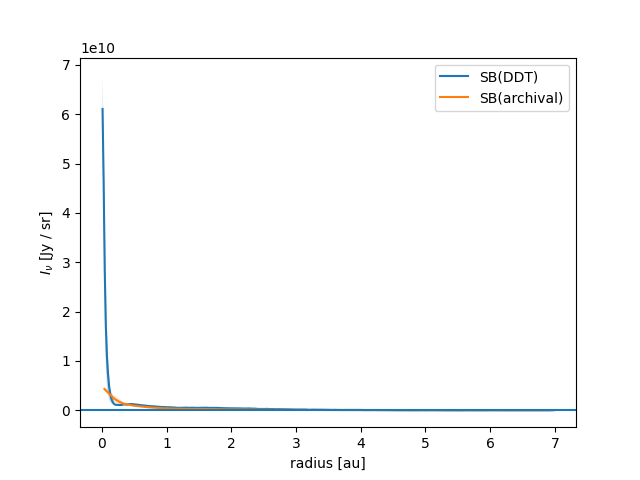

In [58]:

plt.figure()
plt.plot(r_DDT, I_DDT, label="SB(DDT)")
plt.fill_between(r_DDT, I_DDT-dI_DDT, I_DDT + dI_DDT, alpha=0.25)
plt.plot(r_archival, I_archival, label="SB(archival)")
plt.fill_between(r_archival, I_archival-dI_archival, I_archival + dI_archival, alpha=0.25)
plt.axhline(y=0.0)
plt.xlabel("radius [au]")
plt.ylabel("$I_\\nu$ [Jy / sr]")
# plt.yscale("log")
# plt.xscale("log")
# plt.xlim(0, 5)
plt.legend()

In [1]:
import sys
sys.path.append("./data_reduction_trial/")
from reduction_utils3 import export_MS, deproject_vis, plot_deprojected
from eDisk_source_dict import source_dict
%matplotlib widget

source = "L1489IRS"
PA = source_dict[source]["PA"]
incl = source_dict[source]["incl"]

In [88]:
datapath = "/works/yamato/eDisk/L1489IRS/ShortBaseline/eDisk_calibrated_data/"

msfilelist = [datapath + "L1489IRS_{}_continuum_shift.ms".format(i) for i in ["SB1", "SB2"]]

In [70]:
for ms in msfilelist:
    export_MS(ms)

#Measurement set exported to /works/yamato/eDisk/L1489IRS/ShortBaseline/eDisk_calibrated_data/L1489IRS_SB1_continuum_shift.vis.npz
#Measurement set exported to /works/yamato/eDisk/L1489IRS/ShortBaseline/eDisk_calibrated_data/L1489IRS_SB2_continuum_shift.vis.npz
#Measurement set exported to /works/yamato/eDisk/L1489IRS/ShortBaseline/eDisk_calibrated_data/L1489IRS_SB3_continuum_shift.vis.npz


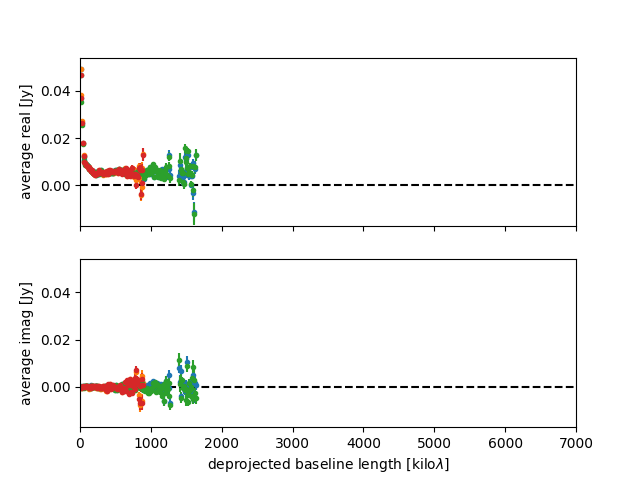

In [91]:
import numpy as np

fig = plot_deprojected(
    [msfilename.replace(".ms", ".vis.npz") for msfilename in msfilelist]
    + [
        "/works/yamato/eDisk/L1489IRS/visibility_analysis/L1489IRS_SB1_continuum_shift.vis.npz",
        "/works/yamato/eDisk/L1489IRS/visibility_analysis/L1489IRS_SB2_continuum_shift.vis.npz",
        # "/works/yamato/eDisk/L1489IRS/visibility_analysis/L1489IRS_LB1_continuum_shift.vis.npz",
        # "/works/yamato/eDisk/L1489IRS/visibility_analysis/L1489IRS_LB2_continuum_shift.vis.npz",
    ],
    PA=PA,
    incl=incl,
    uvbins=10 + 10 * np.arange(700),
)

# fig.axes[0].set(xlim=(0, 1800))
# fig.axes[0].set(yscale="log", ylim=(1e-4, 1e-1), xlim=(0, 1500))
# fig.axes[0].legend()


In [3]:
ms_archival = "/works/yamato/eDisk/L1489IRS/eDisk_calibrated_data_wArchival/L1489IRS_SB1_continuum.ms"
ms_DDT1 = "/works/yamato/eDisk/L1489IRS/visibility_analysis/L1489IRS_SB1_continuum_shift.ms"
ms_DDT2 = "/works/yamato/eDisk/L1489IRS/visibility_analysis/L1489IRS_SB2_continuum_shift.ms"
ms_DDT3 = "/works/yamato/eDisk/L1489IRS/visibility_analysis/L1489IRS_LB1_continuum_shift.ms"
ms_DDT4 = "/works/yamato/eDisk/L1489IRS/visibility_analysis/L1489IRS_LB2_continuum_shift.ms"

# for ms in [ms_archival, ms_DDT1, ms_DDT2, ms_DDT3, ms_DDT4]:
#     export_MS(ms)

[None, (0.0001, 0.1), (0.0, 1500.0)]

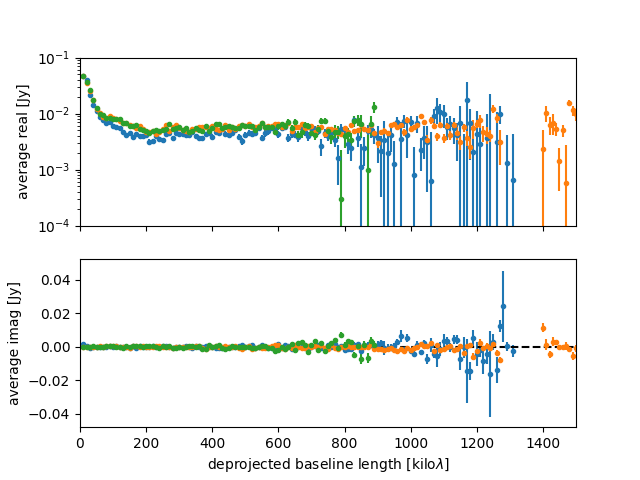

In [14]:
import numpy as np
fig = plot_deprojected(
    [
        ms_archival.replace(".ms", ".vis.npz"),
        ms_DDT1.replace(".ms", ".vis.npz"),
        ms_DDT2.replace(".ms", ".vis.npz"),
        # ms_DDT3.replace(".ms", ".vis.npz"),
        # ms_DDT4.replace(".ms", ".vis.npz"),
    ],
    PA=PA,
    incl=incl,
    uvbins=10 + 10*np.arange(700)
)

fig.axes[0].set(yscale="log", ylim=(1e-4, 1e-1), xlim=(0, 1500))
# fig.axes[0].legend()


In [25]:
6.82+48.1

54.92

In [26]:
56.7+4.64

61.34